In [134]:
import base64
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import io

In [2]:
test_image = "/Users/manuel.martin/personal-projects/imagelens/processor/resources/MSRA-TD500/train/IMG_0030.JPG"

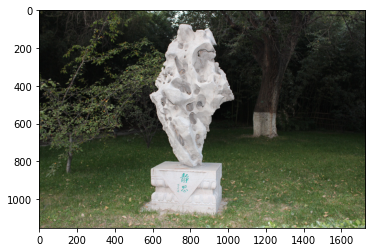

In [60]:
plt.imshow(Image.open(test_image))
plt.show()

In [11]:
pilimage = Image.open(test_image)

In [47]:
im = Image.open(test_image)

In [101]:
im.thumbnail((200, 200))

AttributeError: 'bytes' object has no attribute 'thumbnail'

## **Image Encoding Decoding Tests**

In [88]:
image = open(test_image, "rb").read()

> Read Image as Bytes Array

In [94]:
image[0:10]

b'\xff\xd8\xff\xe0\x00\x10JFIF'

> Get the size of the Bytes Array in Bytes --> 765KB

In [95]:
len(image)

764766

> Encode image with BASE 64 

In [92]:
encoded_im = base64.b64encode(image)

In [96]:
encoded_im[0:10]

b'/9j/4AAQSk'

> Get the size of the base64 encoded image --> 102KB

In [97]:
len(encoded_im)

1019688

> Get Compression Ratio --> 1.3

In [98]:
len(encoded_im)/len(image)

1.3333333333333333

> Decode Image from BASE 64 into Bytes

In [99]:
decoded_im = base64.b64decode(encoded_im)

> Check that the original Bytes Array is equals to the decoded Bytes Array

In [100]:
decoded_im == image

True

### Open Encoded Image with PIL

In [131]:
image_bytearray = bytearray(image)

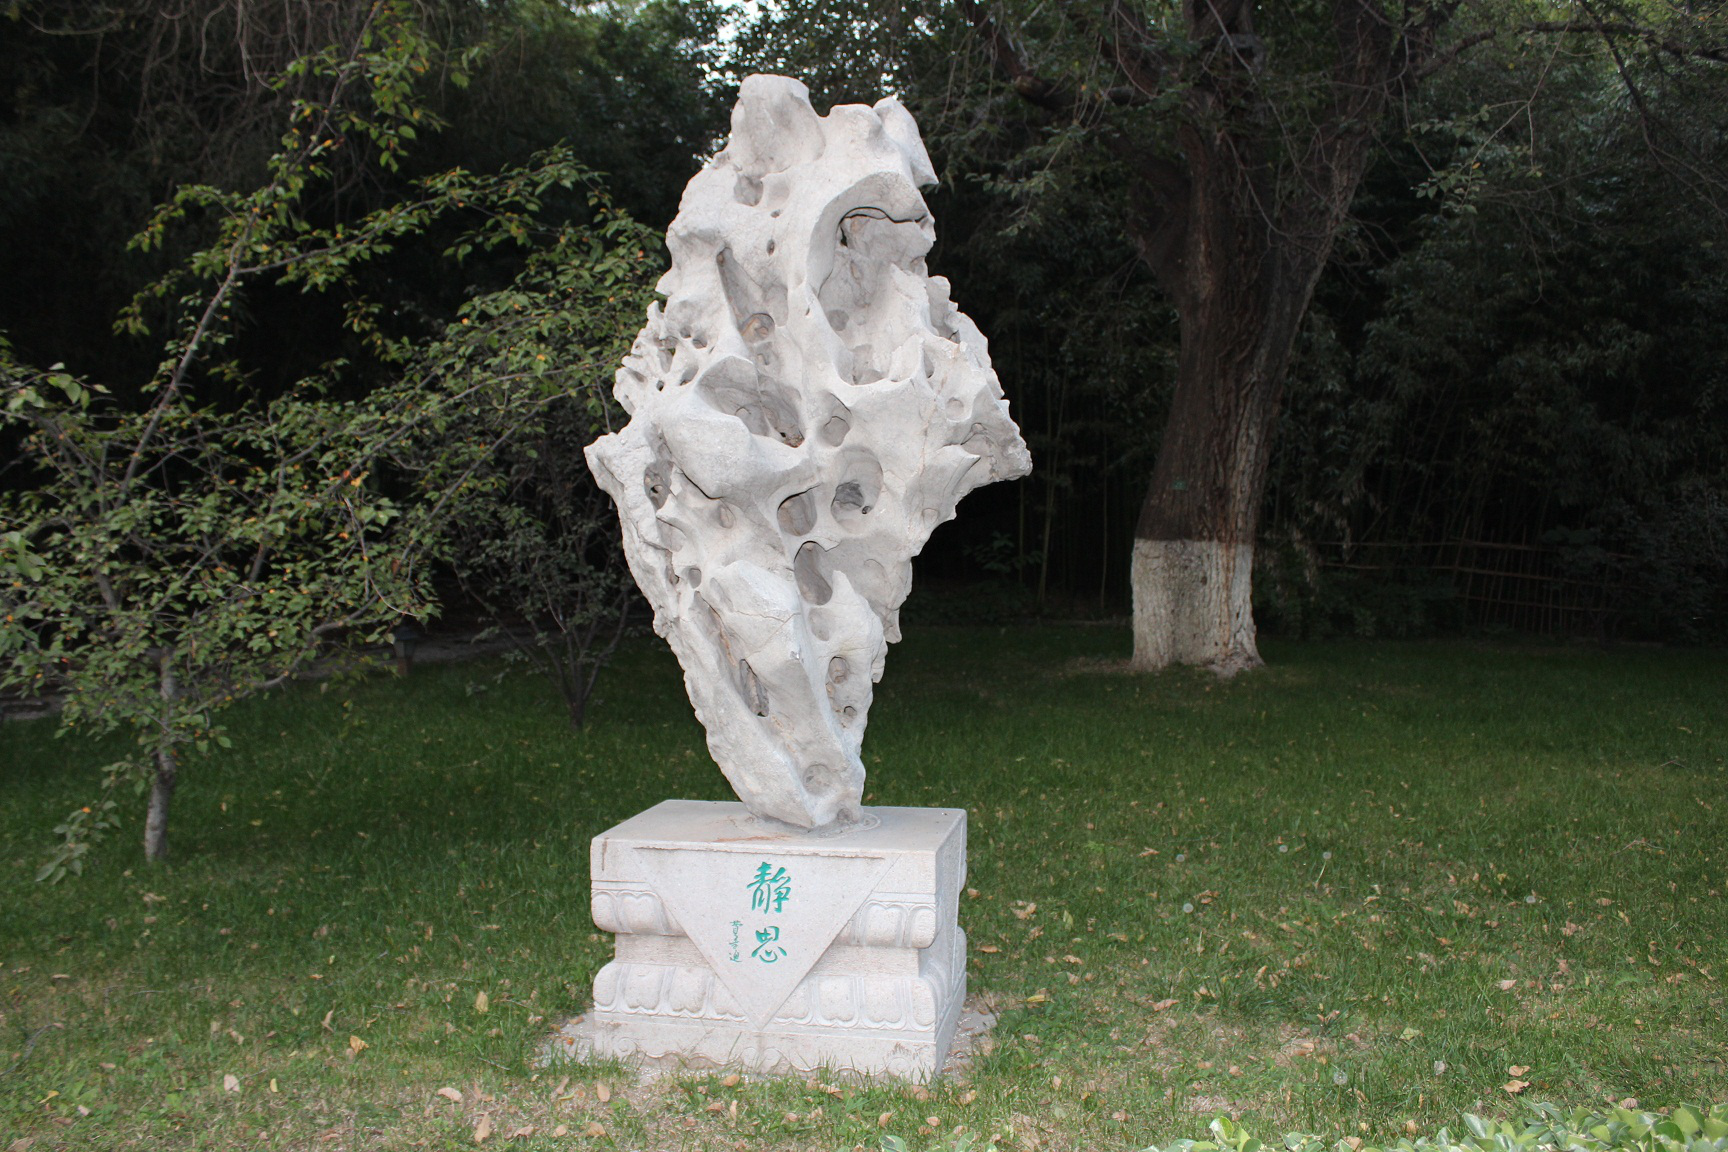

In [133]:
Image.open(io.BytesIO(image_bytearray))  # Tambien funciona con Image.open(io.BytesIO(image))

### Encode and reduce image size

In [155]:
def image_to_array(image):
    if type(image) in (bytes, bytearray):
        return np.array(Image.open(io.BytesIO(image)))
    elif type(image) == np.array:
        return image
    else:
        raise TypeError("Type not recognized")

def resize_image(image, percent=60):
    #image = image_to_array(image)
    w = int(image.shape[1] * percent / 100)
    h = int(image.shape[0] * percent / 100)
    resized = cv2.resize(image, (w, h), interpolation=cv2.INTER_AREA)
    return resized
    

In [167]:
image_np_array = np.array(Image.open(io.BytesIO(image)) )

In [168]:
image_np_array.shape

(1152, 1728, 3)

In [166]:
resized_image_np_array = resize_image(image_np_array)

In [169]:
resized_image_np_array.shape

(691, 1036, 3)

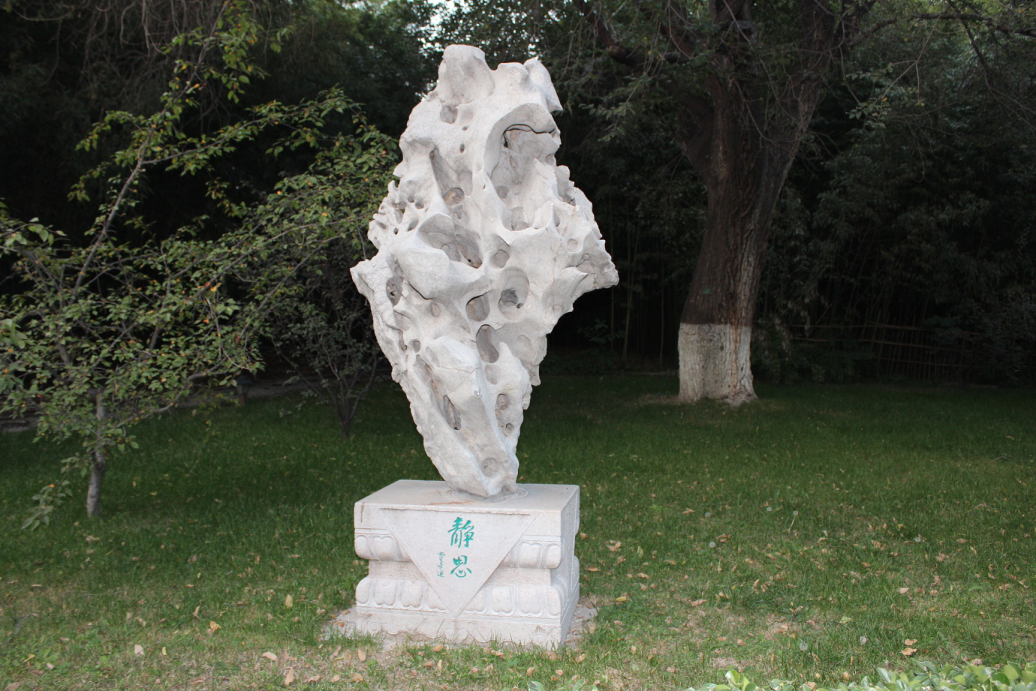

In [173]:
Image.fromarray(resized_image_np_array)